## Análise de séries temporais - Banco Inter
    Dados retirados do site: https://finance.yahoo.com/quote/INBR32.SA/history?p=INBR32.SA - De 2022-08-26 até 2023-12-01

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import smtplib

from datetime import datetime
from email.message import EmailMessage
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [76]:
# Dados Inter
INBR32 = pd.read_csv('INBR32.SA.csv')

#No caso, iremos utilizar somente os valores de fechamento - "Close"
INBR32.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-26,22.15,22.219999,21.00,21.15,21.15,2685566
1,2022-08-29,21.15,21.150000,21.15,21.15,21.15,0
2,2022-08-30,21.15,21.150000,21.15,21.15,21.15,0
3,2022-08-31,21.15,21.150000,21.15,21.15,21.15,0
4,2022-09-01,21.15,21.150000,21.15,21.15,21.15,0


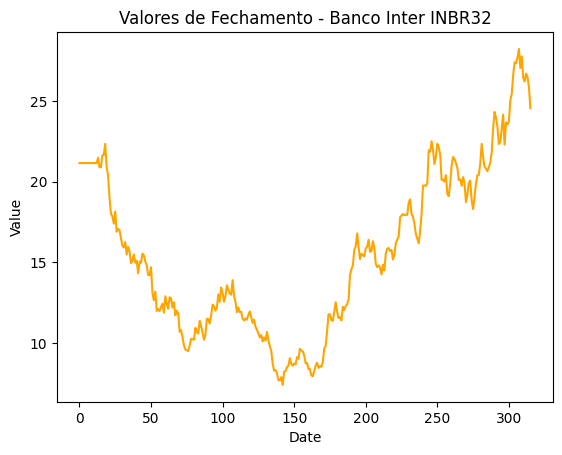

In [77]:
# Plot
plt.plot(INBR32['Close'],'orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Valores de Fechamento - Banco Inter INBR32')
plt.show()

In [78]:
#Visualização de features
INBR32.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [79]:
#Retirada das features não utilizadas
data = INBR32.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=0, inplace=False)
#São 315 dias de registro.
data.shape

(316, 2)

In [80]:
#Check de valores nulos
data.isnull().sum()/len(data)

Date     0.0
Close    0.0
dtype: float64

## TREINO E TESTE

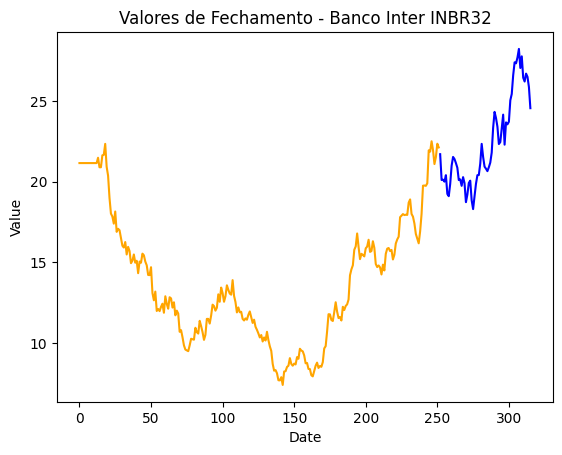

In [91]:
#Divisão entre treino e teste. 
train = data[0:252] #80% - 252 dias 
test = data[252:316] #20% - 64 dias

# Plot
plt.plot(train['Close'],'orange',test['Close'],'b')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Valores de Fechamento - Banco Inter INBR32')
plt.show()

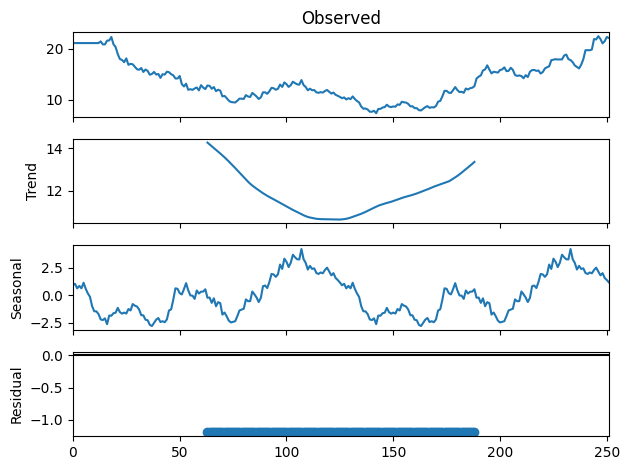

In [93]:
decomp = seasonal_decompose(np.asarray(train['Close']), period=126)
decomp.plot()
plt.show()

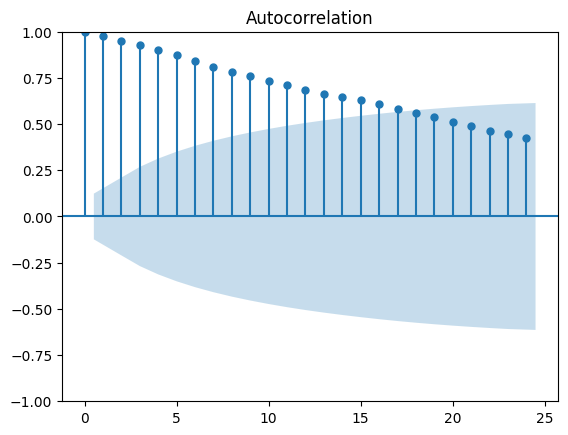

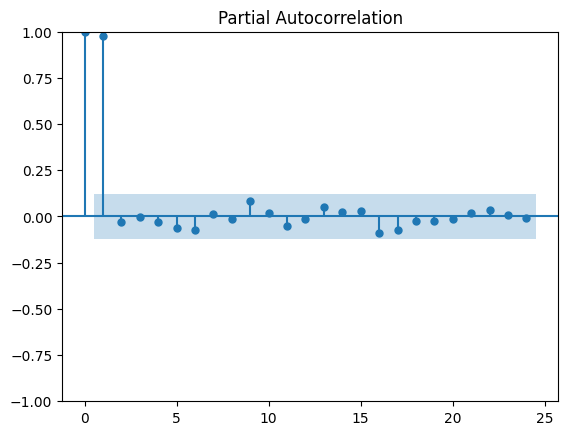

In [55]:
#FAC e FACP
plot_acf(train['Close'])
plot_pacf(train['Close'])
plt.show()

#Percebe-se pelo FACP que o lag = 1.

## ARIMA TREINO

In [68]:
# ARIMA example
# fit model
model = ARIMA(np.asarray(train['Close']), order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1, len(train['Date'])-1)

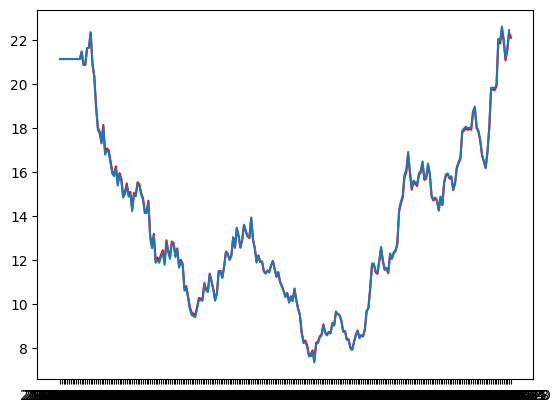

In [69]:
#AIC https://en.wikipedia.org/wiki/Akaike_information_criterion
#BIC https://en.wikipedia.org/wiki/Bayesian_information_criterion
#Quanto menor melhor
#Plot
plt.figure()
plt.plot(train['Date'],train['Close'], 'r', yhat )

In [70]:
#Métricas
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -194.081
Date:                Tue, 05 Dec 2023   AIC                            394.162
Time:                        15:56:12   BIC                            404.726
Sample:                             0   HQIC                           398.414
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9834      0.033     29.548      0.000       0.918       1.049
ma.L1         -0.9597      0.049    -19.780      0.000      -1.055      -0.865
sigma2         0.2764      0.021     13.091      0.000       0.235       0.318
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                10.47
Prob(Q):                              0.75   Prob(JB):                         0.01
Heteroskedasticity (H):               1.24   Skew:                             0.22
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA TESTE

In [71]:
# ARIMA example
# fit model
#model = ARIMA(np.asarray(train['Close']), order=(1, 1, 1))
#model_fit = model.fit()
# make prediction
yhat = model_fit.predict(252,315)
print(yhat)

[22.31989489 22.41735335 22.51318959 22.6074306  22.70010294 22.79123273
 22.88084564 22.96896691 23.05562138 23.14083346 23.22462716 23.30702609
 23.38805347 23.46773212 23.5460845  23.62313268 23.69889837 23.77340292
 23.84666732 23.91871222 23.9895579  24.05922434 24.12773116 24.19509767
 24.26134284 24.32648534 24.39054353 24.45353544 24.51547884 24.57639118
 24.63628961 24.69519101 24.75311199 24.81006885 24.86607765 24.92115416
 24.97531391 25.02857216 25.08094391 25.13244392 25.18308669 25.2328865
 25.28185738 25.33001312 25.3773673  25.42393325 25.4697241  25.51475275
 25.55903188 25.60257397 25.6453913  25.68749592 25.72889969 25.76961428
 25.80965117 25.84902164 25.88773677 25.92580748 25.96324449 26.00005834
 26.03625943 26.07185793 26.10686389 26.14128716]


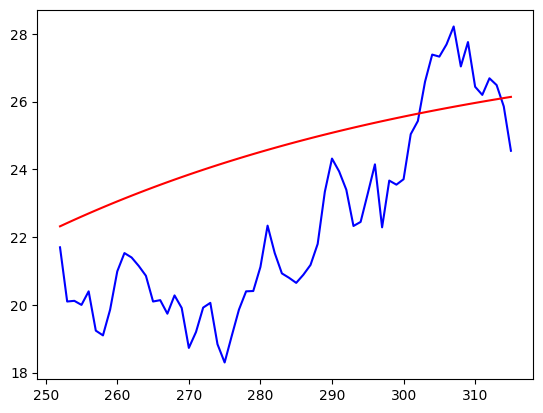

In [72]:
t = range(252,316)
#Plot
plt.figure()
plt.plot(t,test['Close'], 'b', t, yhat , 'r')

## HOLT - WINTERS TREINO

In [61]:
#HWES
# fit model
#model = ExponentialSmoothing(np.asarray(train['Close']))
#model_fit = model.fit()
# make prediction
yhat = model_fit.predict(0, len(train['Date'])-1)
print(yhat)

[18.46296419 21.13542632 21.13542632 21.13542632 21.13542632 21.13542632
 21.13542632 21.13542632 21.13542632 21.13542632 21.13542632 21.13542632
 21.13542632 21.4636365  20.87683549 20.87683549 21.61282195 21.64266023
 22.31897211 20.90667377 20.3596578  18.98714151 18.02240251 17.84337877
 17.4057652  18.15169742 16.89853029 17.08750079 16.99798892 16.51064653
 16.04319667 15.93379228 16.27194822 15.50612447 15.97357533 15.71498549
 14.96905327 15.11823971 15.50612447 14.99889056 15.11823971 14.35241597
 15.0685109  14.99889056 15.55585329 15.45639566 15.0685109  14.83975835
 14.24301257 14.23306681 14.7204092  13.12908712 12.68152778 13.21859899
 12.02510743 12.14445658 12.01516166 12.28369726 12.47266676 11.91570403
 12.93017186 12.462721   12.16434811 12.87049728 12.80087694 12.23396845
 12.56217863 11.75657183 12.04499895 11.86597522 10.742104   10.84156163
 10.40394806  9.90665991  9.64807007  9.59834126  9.54861244  9.90665991
 10.31443619 10.28459891 10.25476162 10.99074808 10

ValueError: x and y must have same first dimension, but have shapes (64,) and (251,)

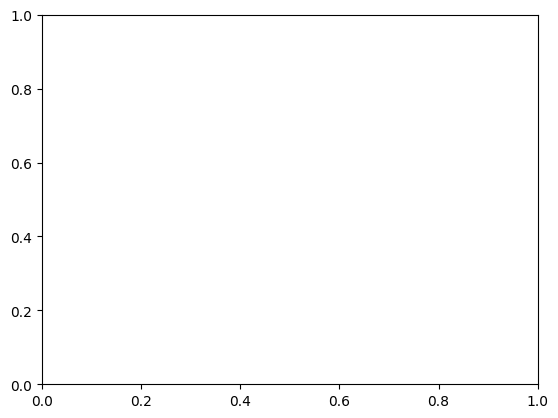

In [62]:
t = range(252,316)
#Plot
plt.figure()
plt.plot(t, test['Close'], 'b', t, yhat , 'r')

In [ ]:
model_fit.summary()

Dep. Variable:,endog,No. Observations:,251
Model:,ExponentialSmoothing,SSE,70.104
Optimized:,True,AIC,-316.144
Trend:,None,BIC,-309.093
Seasonal:,None,AICC,-315.981
Seasonal Periods:,None,Date:,"Mon, 04 Dec 2023"
Box-Cox:,False,Time:,19:42:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,21.150000,l.0,True


## HOLT WINTERS TESTE

In [ ]:
#HWES
# fit model
model = ExponentialSmoothing(np.asarray(train['Close']))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1, len(test['Date']))
print(yhat)

[21.15       21.15       21.15       21.15       21.15       21.15
 21.15       21.15       21.15       21.15       21.15       21.15
 21.48       20.88999901 20.889999   21.62999899 21.66       22.33999999
 20.92000002 20.37000101 18.99000002 18.02000001 17.84       17.40000001
 18.14999999 16.88999902 17.08       16.99       16.50000001 16.03000101
 15.92       16.25999999 15.49000001 15.95999999 15.7        14.95000001
 15.1        15.48999999 14.98000001 15.1        14.33000001 15.04999999
 14.98       15.53999999 15.44       15.05000001 14.82       14.22000001
 14.21       14.69999999 13.10000002 12.65000001 13.18999999 11.99000002
 12.11       11.98       12.25       12.44       11.88000001 12.89999998
 12.43000001 12.13       12.83999999]


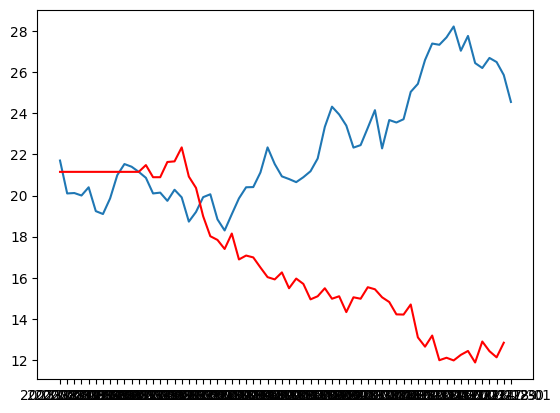

In [ ]:
#Plot
plt.figure()
#plt.plot(train['Date'],test['Close'], 'r', yhat )
plt.plot(test['Date'], test['Close'] , yhat, 'r')